# Health Insurance Premium
## Calculations based on psychological predictors for drug abuse risk
---

# Content:

- 1) Business Understanding
- 2) Data Mining
- 3) Data Cleaning
- 4) Data Exploration & Visualization
- 5) Feature Engineering
- 6) Predictive Modeling
   - a) Cannabis
   - b) Speed
   - c) Cocaine
- 7) Business Application
- 8) Conclusion
- 9) Future Work
---

# 1) Business Understanding

- Setting: Consulting company for private health insurance companies
- customers expect evaluation models to calculate risk premiums on top of the basic health insurance fees
- risk premiums are calculated based on predictions about probability of drug use based on survey data
- survey data: health insurance collects data from potential customers, which we can use for our predictive modeling on drug consumption risk

### Problem Statement
- in order to apply for a private health insurance, customers are asked to fill in a questionnare about demographics and personality traits
- how to translate these data into a model that predicts drug consumption risk and the potential future economic costs associated with drug abuse

### Business Value
- prevent costs caused by customers with drug abuse problem (treatment, sick leaves, ...) by:
    - a) rejecting customers with risk of heavy drug consumption (e.g. heroin)
    - b) charging customers with risk of moderate drug consumption (e.g. cannabis, speed) a risk premium based on the expected health care costs due to that drug abuse

---
# 2) Data Mining

### Data source:
- we were able to use data collected by research facilities
    - 'The Five Factor Model of personality and evaluation of drug consumption risk' (Fehrman et al., 2017)
    - Cornell University, UK
    - link to research article: https://arxiv.org/abs/1506.06297
    - link to dataset and data dictionary: https://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/36536


- anonymous online survey, ran over 12 months, snowball sampling method (biased, see Data Exploration)
- 2051 took part in the survey, 166 excluded due to incorrect answers or inattentiveness

### Dataset:
- 12 features: all numeric based on numerical/categorical feature quantification as described in research article
  - demographic: age, gender, education, country, ethnicity
  - personality:  
      copy/paste p.8
      - impusivity, SS
  - explanation of feature transformation?...
  
  
- 18 drugs: categorized into different temporal consumption patterns
  - CL0	Never Used
  - CL1	Used over a Decade Ago
  - CL2	Used in Last Decade
  - CL3	Used in Last Year
  - CL4	Used in Last Month
  - CL5	Used in Last Week
  - CL6	Used in Last Day

In [1]:
# import basic libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

In [2]:
# load data

df_raw = pd.read_csv('drug_consumption.csv')
print(df_raw.shape)
df_raw.head()

(1885, 32)


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


---
# 3) Data Cleaning
### Duplicates

In [3]:
df_raw.ID.unique().shape[0] == df_raw.shape[0]  # --> no duplicates, ID can be dropped

True

### Missing values

In [4]:
df_raw.isna().sum()  # --> no missing values

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Shrooms      0
Nicotine     0
Semer        0
VSA          0
dtype: int64

### Data types

In [5]:
df_raw.dtypes  # --> features all float, targets all object (will be changed later, see feature engineering)

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Shrooms       object
Nicotine      object
Semer         object
VSA           object
dtype: object

- Note for features: numerical, but only contain different categories 
- Models will run on this numerical data frame, but we will transform these numerical values into categorical values (without loss of information), which are stored in in a new dataframe
- categorical values better interpretable for visualization (see Data Exploration)

In [16]:
# transform Age, Gender, Education, Country, Ethnicity into categorical values
df_raw_cat = df_raw.copy()

# Age
transform_Age = {-0.95197: '18-24', 
                 -0.07854: '25-34', 
                  0.49788: '35-44', 
                  1.09449: '45-54', 
                  1.82213: '55-64', 
                  2.59171: '65+'}
df_raw_cat.Age = df_raw_cat.Age.round(5)
df_raw_cat.Age.replace(transform_Age, inplace=True)
df_raw_cat.Age = pd.Categorical(df_raw_cat.Age)

# Gender
transform_Gender = {-0.48246: 'male', 
                     0.48246: 'female'}
df_raw_cat.Gender = df_raw_cat.Gender.round(5)
df_raw_cat.Gender.replace(transform_Gender, inplace=True)
df_raw_cat.Gender = pd.Categorical(df_raw_cat.Gender)

# Education
transform_Education = {-2.43591: 'Left school before 16 years', 
                       -1.73790: 'Left school at 16 years', 
                       -1.43719: 'Left school at 17 years', 
                       -1.22751: 'Left school at 18 years', 
                       -0.61113: 'Some college or university, no certificate or degree',
                       -0.05921: 'Professional certificate/ diploma', 
                        0.45468: 'University degree',
                        1.16365: 'Master degree', 
                        1.98437: 'Doctorate degree'}
transform_Education_short = {-2.43591: 'left school', 
                             -1.73790: 'left school', 
                             -1.43719: 'left school', 
                             -1.22751: 'left school', 
                             -0.61113: 'college,\nno degree', 
                             -0.05921: 'prof.\ncertificate', 
                              0.45468: 'university\ndegree', 
                              1.16365: 'master\ndegree', 
                              1.98437: 'doctorate\ndegree'}
df_raw_cat.Education = df_raw_cat.Education.round(5)
df_raw_cat.Education.replace(transform_Education_short, inplace=True)
df_raw_cat.Education = pd.Categorical(df_raw_cat.Education)


# Country
transform_Country = {-0.57009: 'USA', 
                     -0.46841: 'New Zealand', 
                     -0.28519: 'Other', 
                     -0.09765: 'Australia', 
                      0.21128: 'Ireland',
                      0.24923: 'Canada', 
                      0.96082: 'UK'}
df_raw_cat.Country = df_raw_cat.Country.round(5)
df_raw_cat.Country.replace(transform_Country, inplace=True)
df_raw_cat.Country = pd.Categorical(df_raw_cat.Country)


# Ethnicity
transform_Ethnicity = {-1.10702: 'Black', 
                       -0.50212: 'Asian', 
                       -0.31685: 'White', 
                       -0.22166: 'Mixed', #-White/Asian"
                        0.11440: 'Other', 
                        0.12600: 'Mixed', # -White/Black' 
                        1.90725: 'Mixed'}
df_raw_cat.Ethnicity = df_raw_cat.Ethnicity.round(5)
df_raw_cat.Ethnicity.replace(transform_Ethnicity, inplace=True)
df_raw_cat.Ethnicity = pd.Categorical(df_raw_cat.Ethnicity)


# Drug use categories
df_raw_cat.replace({'CL0': 'never', 'CL1': '>decade ago', 'CL2': 'last decade', 'CL3': 'last year',
                    'CL4': 'last month', 'CL5': 'last week', 'CL6': 'last day'}, inplace=True)

df_raw_cat.head(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,35-44,female,prof.\ncertificate,UK,Mixed,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,last week,last decade,never,last decade,last day,never,last week,never,never,never,never,never,never,never,never,never,last decade,never,never
1,2,25-34,male,doctorate\ndegree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,last week,last decade,last decade,never,last day,last month,last day,last year,never,last month,never,last decade,never,last decade,last year,never,last month,never,never
2,3,35-44,male,prof.\ncertificate,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,last day,never,never,never,last day,last year,last month,never,never,never,never,never,never,never,never,>decade ago,never,never,never
3,4,18-24,female,master\ndegree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,last month,never,never,last year,last week,last decade,last month,last decade,never,never,never,last decade,never,never,never,never,last decade,never,never
4,5,35-44,female,doctorate\ndegree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,last month,>decade ago,>decade ago,never,last day,last year,last day,never,never,>decade ago,never,never,>decade ago,never,never,last decade,last decade,never,never


In [ ]:
'''# transform Age, Gender, Education, Country, Ethnicity into categorical values

#df_raw_cat = df_raw.iloc[:,1:13].copy()
df_raw_cat = df_raw.copy()

# Age
df_raw_cat.loc[df_raw.Age.round(2) == -0.95, 'Age'] = '18-24'
df_raw_cat.loc[df_raw.Age.round(2) == -0.08, 'Age'] = '25-34'
df_raw_cat.loc[df_raw.Age.round(2) ==  0.50, 'Age'] = '35-44'
df_raw_cat.loc[df_raw.Age.round(2) ==  1.09, 'Age'] = '45-54'
df_raw_cat.loc[df_raw.Age.round(2) ==  1.82, 'Age'] = '55-64'
df_raw_cat.loc[df_raw.Age.round(2) ==  2.59, 'Age'] = '65+'
df_raw_cat.Age = pd.Categorical(df_raw_cat.Age)

# Gender
df_raw_cat.loc[df_raw.Gender < 0, 'Gender'] = 'male'
df_raw_cat.loc[df_raw.Gender > 0, 'Gender'] = 'female'
df_raw_cat.Gender = pd.Categorical(df_raw_cat.Gender)

# Education
#df_raw_cat.loc[df_raw.Education.round(2) == -2.44, 'Education'] = 'Left school before 16 years'
#df_raw_cat.loc[df_raw.Education.round(2) == -1.74, 'Education'] = 'Left school at 16 years'
#df_raw_cat.loc[df_raw.Education.round(2) == -1.44, 'Education'] = 'Left school at 17 years'
#df_raw_cat.loc[df_raw.Education.round(2) == -1.23, 'Education'] = 'Left school at 18 years'
#df_raw_cat.loc[df_raw.Education.round(2) == -0.61, 'Education'] = 'Some college or university, no certificate or degree'
#df_raw_cat.loc[df_raw.Education.round(2) == -0.06, 'Education'] = 'Professional certificate/ diploma'
#df_raw_cat.loc[df_raw.Education.round(2) ==  0.45, 'Education'] = 'University degree'
#df_raw_cat.loc[df_raw.Education.round(2) ==  1.16, 'Education'] = 'Master degree'
#df_raw_cat.loc[df_raw.Education.round(2) ==  1.98, 'Education'] = 'Doctorate degree'

df_raw_cat.loc[df_raw.Education.round(2) == -2.44, 'Education'] = 'left school'
df_raw_cat.loc[df_raw.Education.round(2) == -1.74, 'Education'] = 'left school'
df_raw_cat.loc[df_raw.Education.round(2) == -1.44, 'Education'] = 'left school'
df_raw_cat.loc[df_raw.Education.round(2) == -1.23, 'Education'] = 'left school'
df_raw_cat.loc[df_raw.Education.round(2) == -0.61, 'Education'] = 'college,\nno degree'
df_raw_cat.loc[df_raw.Education.round(2) == -0.06, 'Education'] = 'prof.\ncertificate'
df_raw_cat.loc[df_raw.Education.round(2) ==  0.45, 'Education'] = 'university\ndegree'
df_raw_cat.loc[df_raw.Education.round(2) ==  1.16, 'Education'] = 'master\ndegree'
df_raw_cat.loc[df_raw.Education.round(2) ==  1.98, 'Education'] = 'doctorate\ndegree'
df_raw_cat.Education = pd.Categorical(df_raw_cat.Education)

# Country
df_raw_cat.loc[df_raw.Country.round(2) == -0.57, 'Country'] = 'USA'
df_raw_cat.loc[df_raw.Country.round(2) == -0.47, 'Country'] = 'New Zealand'
df_raw_cat.loc[df_raw.Country.round(2) == -0.29, 'Country'] = 'Other'
df_raw_cat.loc[df_raw.Country.round(2) == -0.10, 'Country'] = 'Australia'
df_raw_cat.loc[df_raw.Country.round(2) ==  0.21, 'Country'] = 'Ireland'
df_raw_cat.loc[df_raw.Country.round(2) ==  0.25, 'Country'] = 'Canada'
df_raw_cat.loc[df_raw.Country.round(2) ==  0.96, 'Country'] = 'UK'
df_raw_cat.Country = pd.Categorical(df_raw_cat.Country)

# Ethnicity
df_raw_cat.loc[df_raw.Ethnicity.round(2) == -1.11, 'Ethnicity'] = 'Black'
df_raw_cat.loc[df_raw.Ethnicity.round(2) == -0.50, 'Ethnicity'] = 'Asian'
df_raw_cat.loc[df_raw.Ethnicity.round(2) == -0.32, 'Ethnicity'] = 'White'
df_raw_cat.loc[df_raw.Ethnicity.round(2) == -0.22, 'Ethnicity'] = 'Mixed' #-White/Asian'  #?
df_raw_cat.loc[df_raw.Ethnicity.round(2) ==  0.11, 'Ethnicity'] = 'Other'
df_raw_cat.loc[df_raw.Ethnicity.round(2) ==  0.13, 'Ethnicity'] = 'Mixed' # -White/Black'  #?
df_raw_cat.loc[df_raw.Ethnicity.round(2) ==  1.91, 'Ethnicity'] = 'Mixed' #-Black/Asian'
df_raw_cat.Ethnicity = pd.Categorical(df_raw_cat.Ethnicity)

#print(df_cat.dtypes)
df_raw_cat.replace({'CL0': 'never', 'CL1': '>decade ago', 'CL2': 'last decade', 'CL3': 'last year',
                    'CL4': 'last month', 'CL5': 'last week', 'CL6': 'last day'}, inplace=True)

df_raw_cat.head(5)'''

In [17]:
df_raw.Age.value_counts().sort_index()

-0.95197    643
-0.07854    481
 0.49788    356
 1.09449    294
 1.82213     93
 2.59171     18
Name: Age, dtype: int64

In [18]:
df_raw_cat.Age.value_counts().sort_index()

18-24    643
25-34    481
35-44    356
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64

### Drop over-claimers

In [19]:
# check subjects who state having used ficticious drug (Semer) = 9 observations
df_raw.Semer.value_counts()

CL0    1877
CL2       3
CL3       2
CL1       2
CL4       1
Name: Semer, dtype: int64

In [20]:
# get names of indices for subjects who stated having used ficticious drug
drop_indices = df_raw[df_raw.Semer != 'CL0'].index

# delete these row indexes from dataFrame
df = df_raw.copy()
df.drop(drop_indices, inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape, df.index

((1877, 32), RangeIndex(start=0, stop=1877, step=1))

In [21]:
# also drop these subjects from the categorical dataframe
df_cat = df_raw_cat.copy()
df_cat.drop(drop_indices, inplace=True)
df_cat.reset_index(inplace=True, drop=True)
df_cat.shape, df_cat.index

((1877, 32), RangeIndex(start=0, stop=1877, step=1))

---
# 4) Data Exploration & Visualization
### Demographical data

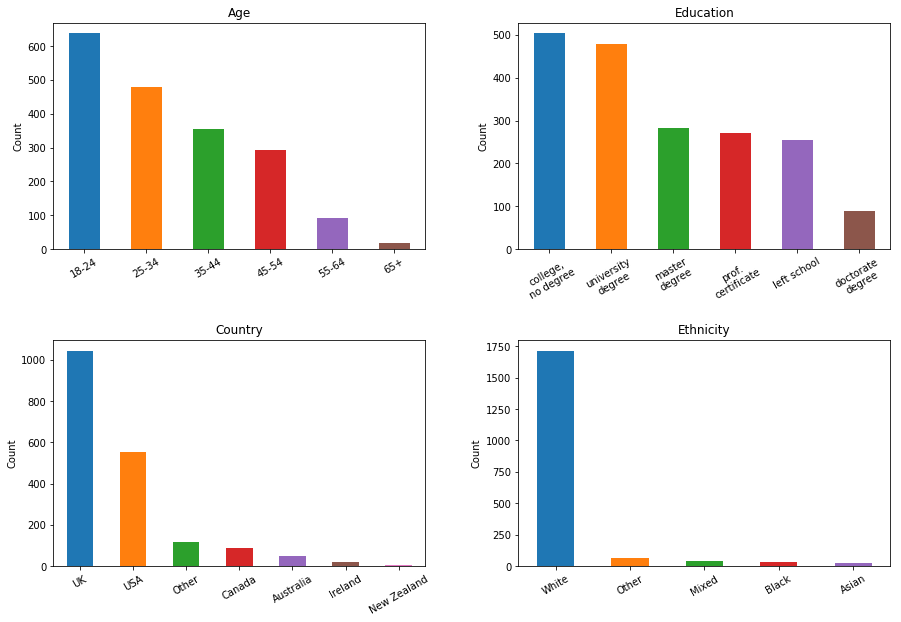

In [22]:
# a) plot distributions of main demographical variables (to better understand sample)
    # --> sample distributions fit to our customer group

fig, ax = plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(hspace=0.4, wspace=0.25)

# Age
plt.subplot(221)
df_cat.Age.value_counts().plot(kind='bar');
plt.xticks(rotation=30)
plt.title('Age')
plt.ylabel('Count');

# Education
plt.subplot(222)
df_cat.Education.value_counts().plot(kind='bar');
plt.xticks(rotation=30)
plt.title('Education')
plt.ylabel('Count');

# Country
plt.subplot(223)
df_cat.Country.value_counts().plot(kind='bar');
plt.xticks(rotation=30)
plt.title('Country')
plt.ylabel('Count');

# Ethnicity
plt.subplot(224)
df_cat.Ethnicity.value_counts().plot(kind='bar');
plt.xticks(rotation=30)
plt.title('Ethnicity')
plt.ylabel('Count');

### Personality traits

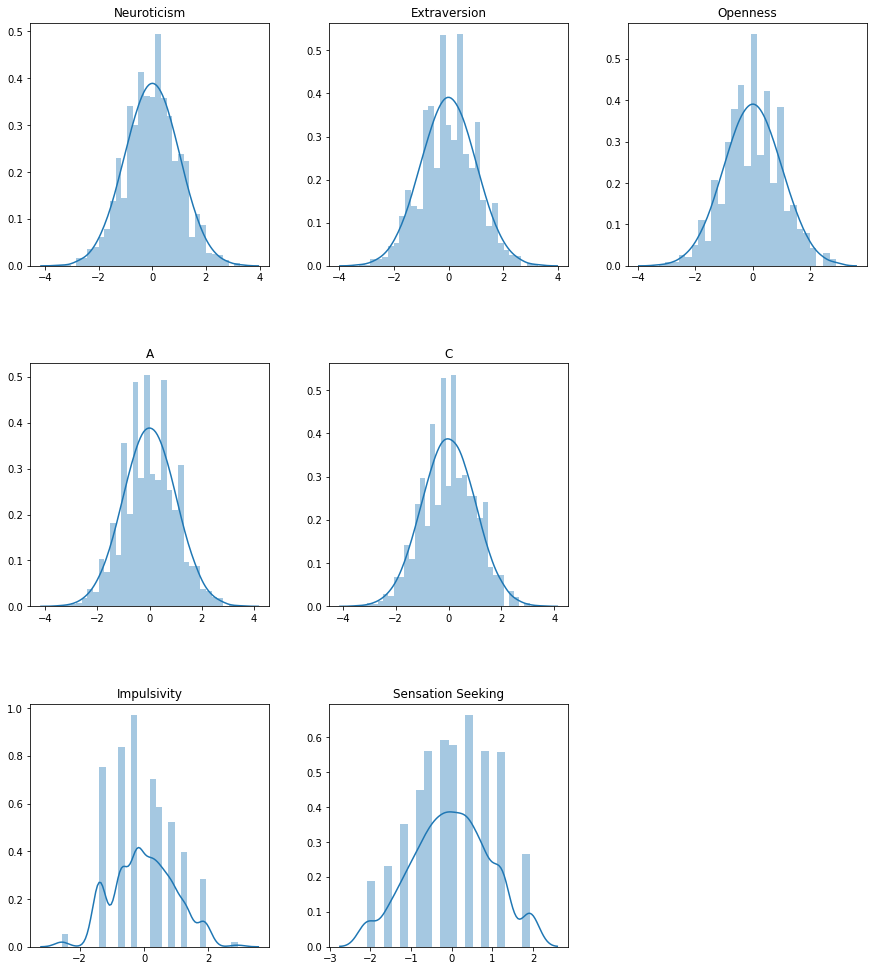

In [23]:
# b) plot distribution of all personality traits

fig, ax = plt.subplots(3,3,figsize=(15,17))
plt.subplots_adjust(hspace=0.4, wspace=0.25)

# Nscore
plt.subplot(331)
sns.distplot(df_cat.Nscore)
plt.title('Neuroticism')
plt.xlabel('');

# Escore
plt.subplot(332)
sns.distplot(df_cat.Escore)
plt.title('Extraversion')
plt.xlabel('');

# Openness
plt.subplot(333)
sns.distplot(df_cat.Oscore)
plt.title('Openness')
plt.xlabel('');

# Agreeableness
plt.subplot(334)
sns.distplot(df_cat.Ascore)
plt.title('A')
plt.xlabel('');

# Con
plt.subplot(335)
sns.distplot(df_cat.Cscore)
plt.title('C')
plt.xlabel('');

plt.subplot(336)
plt.axis('off');

# Impulsivity
plt.subplot(337)
sns.distplot(df_cat.Impulsive)
plt.title('Impulsivity')
plt.xlabel('');

# Sensation Seeking
plt.subplot(338)
sns.distplot(df_cat.SS)
plt.title('Sensation Seeking')
plt.xlabel('');

plt.subplot(339)
plt.axis('off');

### Drug consumption

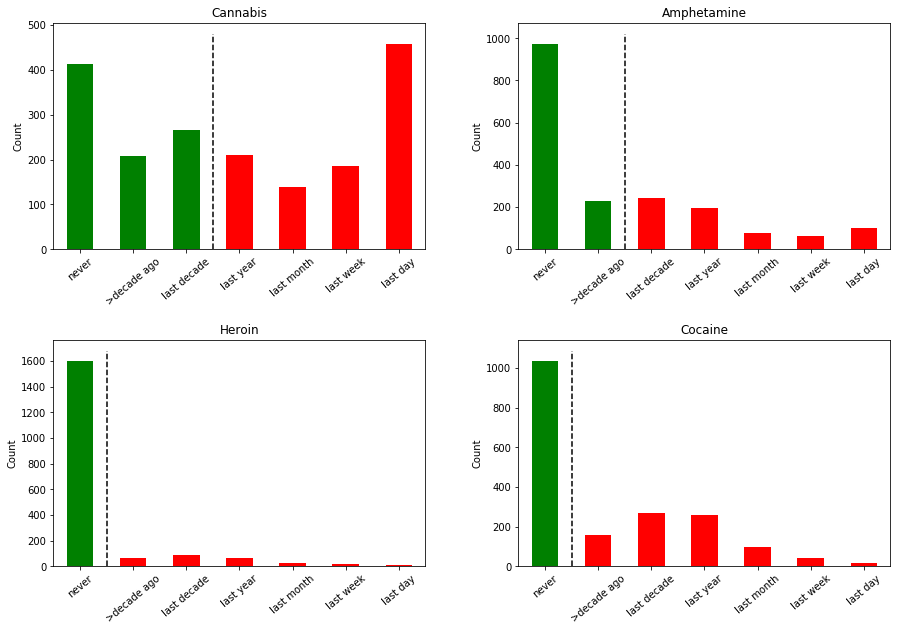

In [24]:
# c) plot counts/distributions of 3 drugs we consider (for all temporal categories)

# create customized color map for plotting
cmap = matplotlib.cm.get_cmap('brg')
my_colors = [cmap(x) for x in list(np.linspace(0.9,0.45,7))]
my_colors_C = ['green', 'green', 'green', 'red', 'red', 'red', 'red']
my_colors_A = ['green', 'green', 'red', 'red', 'red', 'red', 'red']
my_colors_H = ['green', 'red', 'red', 'red', 'red', 'red', 'red']

# create bar plots, sorted by recency of use

fig, ax = plt.subplots(2,2,figsize=(15,10))
plt.subplots_adjust(hspace=0.4, wspace=0.25)

# Cannabis
plt.subplot(221)
sorted_indices = ['never', '>decade ago', 'last decade', 'last year', 'last month', 'last week', 'last day']
df_cat.Cannabis.value_counts().reindex(sorted_indices).plot(kind='bar', color=my_colors_C)
plt.xticks(rotation=40)
plt.ylabel('Count')
plt.title('Cannabis')
plt.vlines(2.5,plt.gca().get_ylim()[0],plt.gca().get_ylim()[1], linestyles='dashed', colors='k');

# Amphetamine
plt.subplot(222)
df_cat.Amphet.value_counts().reindex(sorted_indices).plot(kind='bar', color=my_colors_A)
plt.xticks(rotation=40)
plt.ylabel('Count')
plt.title('Amphetamine')
plt.vlines(1.5,plt.gca().get_ylim()[0],plt.gca().get_ylim()[1], linestyles='dashed', colors='k');

# Heroin
plt.subplot(223)
df_cat.Heroin.value_counts().reindex(sorted_indices).plot(kind='bar', color=my_colors_H)
plt.xticks(rotation=40)
plt.ylabel('Count')
plt.title('Heroin')
plt.vlines(0.5,plt.gca().get_ylim()[0],plt.gca().get_ylim()[1], linestyles='dashed', colors='k');

# Cocain
plt.subplot(224)
#plt.axis('off');
df_cat.Coke.value_counts().reindex(sorted_indices).plot(kind='bar', color=my_colors_H)
plt.xticks(rotation=40)
plt.ylabel('Count')
plt.title('Cocaine')
plt.vlines(0.5,plt.gca().get_ylim()[0],plt.gca().get_ylim()[1], linestyles='dashed', colors='k');

In [ ]:
# d) Optional: conditional counts/probabilities

---
# 5) Feature Engineering

- dataset includes 7 categories of drug users
   - CL0	Never Used
   - CL1	Used over a Decade Ago
   - CL2	Used in Last Decade
   - CL3	Used in Last Year
   - CL4	Used in Last Month
   - CL5	Used in Last Week
   - CL6	Used in Last Day
   
   
- for our model, we transform these categories into a binary target variable (2 classes):
    - 0: non-user
    - 1: user
    
    
- there are different ways to make this classification. We will use three different ways, based on the physical damage potential of the drug:
    - a strict definition for very harmful drugs like heroin
        - CL0 = non-user, CL1-CL6 = user
    - a moderate definition for moderately harmful drugs like amphetamines (e.g. speed)
        - CL0/CL1 = non-user, CL2-CL6 = user
    - a liberal definition for light drugs like cannabis
        - CL0-CL2 = non-user, CL3-CL6 = user

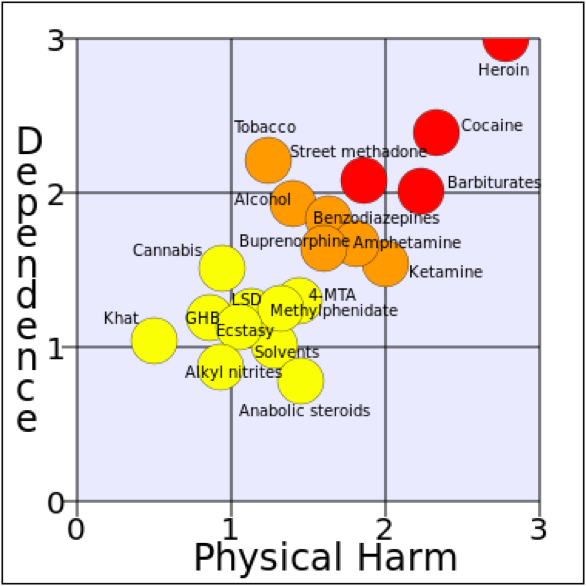

In [25]:
pic1 = 'drug_harm_500px.png'
# https://upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Rational_scale_to_assess_the_
# harm_of_drugs_%28mean_physical_harm_and_mean_dependence%29.svg/500px-Rational_scale_to_
# assess_the_harm_of_drugs_%28mean_physical_harm_and_mean_dependence%29.svg.png

pic2 = 'drug_harm_plot.png'  # better!
# https://uploads-ssl.webflow.com/5ad143610f7efd77b6f188f3/5b2f4a032dc9c81f5e6486cf_pasted-image-0.png

from IPython.display import Image
Image(pic2, width=500)

In [26]:
# transforming drug cagtegories into classes (non-user/user)

# CL0	Never Used
#------------------------------- (strict)
# CL1	Used over a Decade Ago
#------------------------------- (moderate)
# CL2	Used in Last Decade
#------------------------------- (liberal)
# CL3	Used in Last Year
# CL4	Used in Last Month
# CL5	Used in Last Week
# CL6	Used in Last Day

df_model = df.iloc[:,1:13].copy()

Heroin_1   = pd.Series([0 if x=='CL0' else 1 for x in df.Heroin], name='Heroin')
Coke_1     = pd.Series([0 if x=='CL0' else 1 for x in df.Coke], name='Coke')
Amphet_2   = pd.Series([0 if x=='CL0' or x=='CL1' else 1 for x in df.Ecstasy], name='Amphet')
Cannabis_3 = pd.Series([0 if x=='CL0' or x=='CL1' or x=='CL2' else 1 for x in df.Cannabis], name='Cannabis')

df_model = pd.concat([df_model, Cannabis_3, Amphet_2, Heroin_1, Coke_1], axis=1)
print(df_model.index, df_model.shape)
df_model.head()

RangeIndex(start=0, stop=1877, step=1) (1877, 16)


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis,Amphet,Heroin,Coke
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,0,1
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0,1
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0


In [ ]:
# Future Work: do it for all remaining drugs, or even for drug groups/pleiades

---
# 7) Predictive Modeling

For our business case, we have different requirements concerning the evaluation metrics of our models, depending on the physical damage potential of the drug

#### 1) moderate (amphetamine) and very high (heroin)
   - we want to correctly identify customers with a high probability of taking very harmful drugs due to the high expected treatment costs associated with that drug usage
     - in case of heroin, we want to completely reject the customer because the insurance fees will not cover potential treatment costs
     - in case of amphetamine, we want to charge the customer an additional risk premium in order to minimize the potential loss due to costs associated with drug abuse
   - in both cases we therefore want to avoid classifying a person as non-user, who has actually already consumed the drug or has a high probability to do so in the future
   - we want to **minimize false negatives (FN)**, hence we want to **maximize recall**
     
#### 2) low (cannabis)
   - in this case, the risk premium we charge will cover the potential treatment costs associated with the consumption of the drug, hence we are indifferent when it comes to accepting these customers
   - but we want to maximize our client pool and profits, therefore we don't want to charge an additional premium to potential customers falling into this category because this might result in loosing the customer to the competitors who classifies the customer correctly and doesn't charge a risk premium
   - we therefore want to avoid classifying a person as user, who has actually never consumed the drug or has no risk of doing so in the future
   - we want to **minimize false positives (FP)**, hence we want to **maximize precision**


The procedure of predicitive modeling for each drug is as follows:
   - splitting data into training and testing set
   - fit a set of classifiers to the training data
   - make predictions for the testing data
   - evaluate model performance by comparing true and predicted values
   - select the model which best fits our needs (see business requirements above)
   - use the resulting model in our business application (see below)

### Preparing basic functions for predictive modeling

Create four basic functions that can be called later for each drug case. 

In [38]:
# (a) function to initialize a set of different classifiers

# import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


def initialize_clfs(rseed = 5, k=5, min_samples_leaf=20):
    
    logr = LogisticRegression(solver = 'liblinear', random_state = rseed)      # lbfgs
    dt  = DecisionTreeClassifier(random_state = rseed, min_samples_leaf=min_samples_leaf)
    rf  = RandomForestClassifier(random_state = rseed) 
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    nb  = GaussianNB()
    svm = SVC(gamma = 'scale', probability = True, random_state = rseed)
    ada = AdaBoostClassifier(random_state = rseed)
    xgb = XGBClassifier()

    all_clfs = [logr, dt, rf, knn, nb, svm, ada, xgb]
    
    return all_clfs

In [28]:
# (b) function that fits classifiers, displays evaluation metrics and returns for each classifier a list with:
      # [0]: the fitted classifier object
      # [1]: the evaluation metrics
      # [2]: the true test values
      # [3]: the predicted class (0/1) for test set
      # [4]: the predicted probability (p of y=1) for test set
      # [5]: the confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def fit_eval_clfs(all_clfs, X_train, X_test, y_train, y_test):
     
    fitted_clfs = {}
    eval_list, clf_list, cm_list = [], [], []
        
    for clf in all_clfs:
        
        # fit classifier to train set and make predictions for test set
        clf_name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:,1]
    
        # get evaluation metrics for classifier and save in dictionary
        eval_metrics = {}
        eval_metrics['acc'] = accuracy_score(y_test, y_pred)
        eval_metrics['recall'] = recall_score(y_test, y_pred)
        eval_metrics['precision'] = precision_score(y_test, y_pred)
        eval_metrics['f1_score'] = f1_score(y_test, y_pred)
        eval_list.append(eval_metrics)
        
        # get confusion matrix for classifier
        cm = confusion_matrix(y_test, y_pred)  #.ravel()
        
        # store for each classifier: fitted clf, evaluation metrics, true & predicted values, confusion matrix
        fitted_clfs[clf_name] = [clf, eval_metrics, y_test, y_pred, y_pred_proba, cm]
        
    # print evaluation metrics for all fitted models
    eval_df = pd.DataFrame(eval_list, index = list(fitted_clfs.keys()))
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        display(eval_df)
    
    return fitted_clfs

In [120]:
# same as (b), but returns evaluation metrics based on Kfold cross validation instead of simple train/test split
      # [0]: the fitted classifier object
      # [1]: the evaluation metrics based on Kfold CV
      # [2]: the true y values
      # [3]: the predicted class (0/1) based on Kfold CV
      # [4]: the predicted probability (p of y=1) based on Kfold CV
      # [5]: the confusion matrix based on Kfold CV
        
        
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer

def fit_eval_clfs_Kfold(all_clfs, X, y, K=10):
     
    fitted_clfs = {}
    eval_list, clf_list, cm_list = [], [], []
        
    for clf in all_clfs:
        
        # fit classifier to train set and make predictions for test set
        clf_name = clf.__class__.__name__
        clf.fit(X, y)
        y_pred = cross_val_predict(clf, X, y, cv=K)
        y_pred_proba = cross_val_predict(clf, X, y, cv=K, method='predict_proba')[:,1]
    
        # get Kfold cross validation scores and save in dictionary
        scoring = {'accuracy': make_scorer(accuracy_score),
                   'f1_score': make_scorer(f1_score),
                   'precision': make_scorer(precision_score),
                   'recall': make_scorer(recall_score)}
        scores = cross_validate(clf, X, y, scoring=scoring, cv=K, return_train_score=False)

        eval_metrics = {}
        eval_metrics['acc'] = scores['test_accuracy'].mean()
        eval_metrics['recall'] = scores['test_f1_score'].mean()
        eval_metrics['precision'] = scores['test_precision'].mean()
        eval_metrics['f1_score'] = scores['test_recall'].mean()
        eval_list.append(eval_metrics)
        
        # get confusion matrix based on Kfold cross validation
        cm = confusion_matrix(y, y_pred)
        
        # store for each classifier: fitted clf, evaluation metrics, true & predicted values, confusion matrix
        fitted_clfs[clf_name] = [clf, eval_metrics, y, y_pred, y_pred_proba, cm]
        
    # print evaluation metrics for all fitted models
    eval_df = pd.DataFrame(eval_list, index = list(fitted_clfs.keys()))
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        display(eval_df)
    
    return fitted_clfs

In [30]:
# (c) function that plots the confusion matrices of all fitted classifiers

def plot_confusion_matrices(fitted_clfs):
    
    # set up the multiplot
    n_col_plot = 3
    n_row_plot = int(np.ceil(len(fitted_clfs)/3))
    plt.subplots(n_row_plot, n_col_plot, figsize=(15,5*n_row_plot))

    # plot confusion matrix for each classifier
    for i, clf in enumerate(fitted_clfs, start=1):
        
        plt.subplot(n_row_plot, n_col_plot, i)
        cm = fitted_clfs[clf][5]  # get confusion matrix for fitted classifier
        sns.heatmap(cm, annot=True, annot_kws={"size":30}, cmap='Blues', square=True, fmt='.0f')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.title(clf);  
    
    # clear axes from empty subplots
    n_subplots = n_row_plot*n_col_plot
    i = i+1
    while i <= n_subplots:        
        plt.subplot(n_row_plot, n_col_plot, i)
        plt.axis('off')
        i += 1

In [116]:
# (d) function that plots the roc curves of all fitted classifiers

from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curves(fitted_clfs):
    
    fig, ax = plt.subplots(figsize=(10,7))
    plt.plot([0,1],[0,1],'k-',label='random')
    plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')

    for clf in fitted_clfs:
    
        y_true = fitted_clfs[clf][2]  # get the true y values
        y_pred = fitted_clfs[clf][3]  # get the predicted y values
        fpr, tpr, thresholds_RF = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        plt.plot(fpr, tpr, label='%s | AUC=%.3f'%(clf, auc))   
    
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show();

## a) Cannabis
- looking for classifier with **high precision** (minimal FP)

,acc,f1_score,precision,recall
LogisticRegression,0.81,0.79,0.84,0.80
DecisionTreeClassifier,0.78,0.77,0.80,0.77
RandomForestClassifier,0.79,0.77,0.84,0.78
KNeighborsClassifier,0.78,0.78,0.80,0.78
GaussianNB,0.80,0.79,0.83,0.80
SVC,0.80,0.81,0.82,0.80
AdaBoostClassifier,0.80,0.79,0.83,0.80
XGBClassifier,0.80,0.81,0.82,0.80


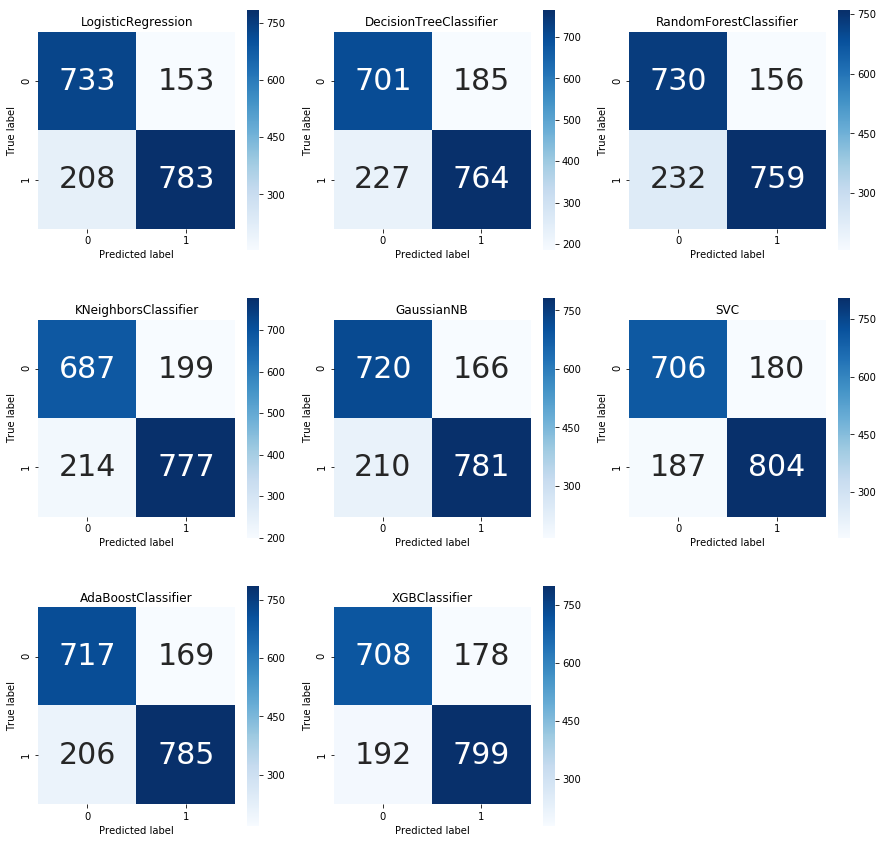

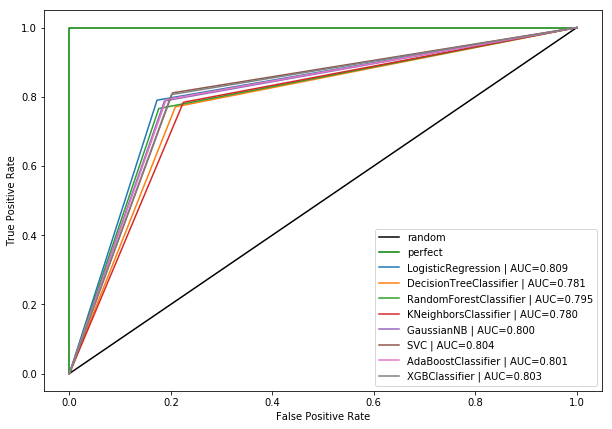

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# step 1: separate input features (X) and target (y)
drug = 'Cannabis'
X = df_model.iloc[:,:12]
X = StandardScaler().fit_transform(X)
y = df_model[drug]


# step 2: split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)


# step 3: fit and evaluate classifiers for this drug
all_clfs = initialize_clfs()
#fitted_clfs = fit_eval_clfs(all_clfs, X_train, X_test, y_train, y_test)     # simple train/test split
fitted_clfs = fit_eval_clfs_Kfold(all_clfs, X, y, K=10)                      # Kfold
plot_confusion_matrices(fitted_clfs)
plot_roc_curves(fitted_clfs)

Conclusion Cannabis:
- **Logistic Regression** yields the highest precision (our criterium), but also high recall (and highest AUC)
- Future Work: in case that differnet classifiers yield similar results, take also into consideration the ease of implementation and calculation time.


- ROC curve appearance (edge) might be due to imbalanced data, see:
    - https://datascience.stackexchange.com/questions/24315/roc-curve-shows-strange-results-for-imbalanced-dataset
- Future Work: consider using PR curves in this case, see:
    - https://machinelearning.wustl.edu/mlpapers/paper_files/icml2006_DavisG06.pdf

## b) Amphetamine
- looking for classifier with **high recall** (minimal FN)

,acc,f1_score,precision,recall
LogisticRegression,0.74,0.64,0.76,0.65
DecisionTreeClassifier,0.70,0.62,0.66,0.61
RandomForestClassifier,0.71,0.56,0.70,0.60
KNeighborsClassifier,0.70,0.62,0.67,0.62
GaussianNB,0.72,0.70,0.68,0.66
SVC,0.74,0.68,0.72,0.66
AdaBoostClassifier,0.73,0.65,0.71,0.65
XGBClassifier,0.73,0.67,0.69,0.65


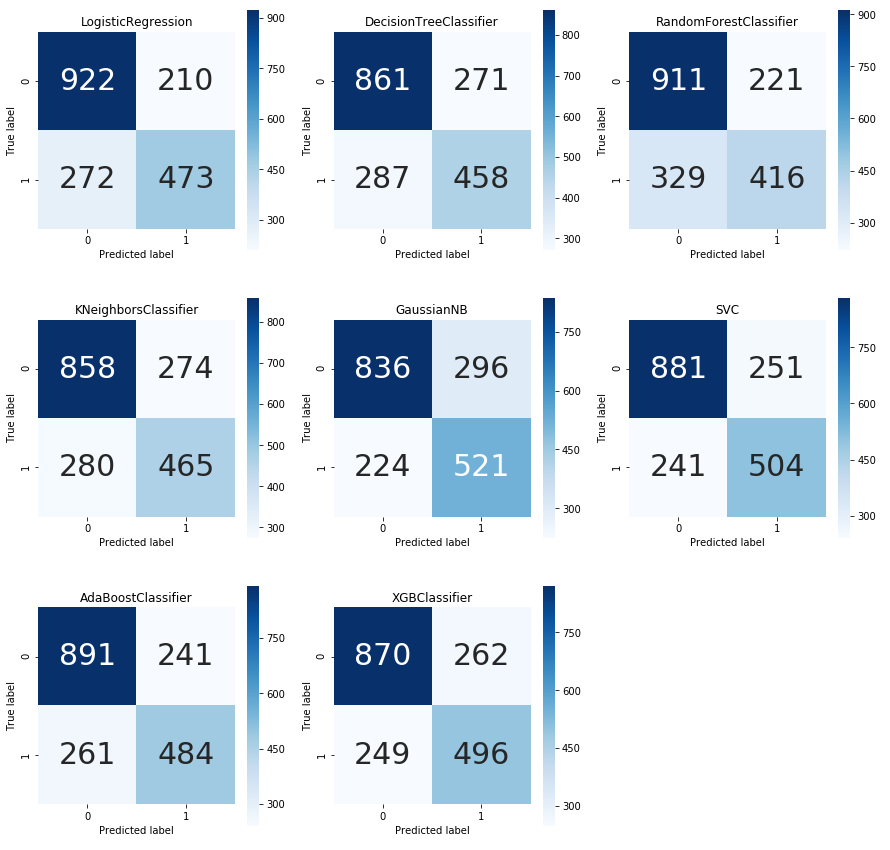

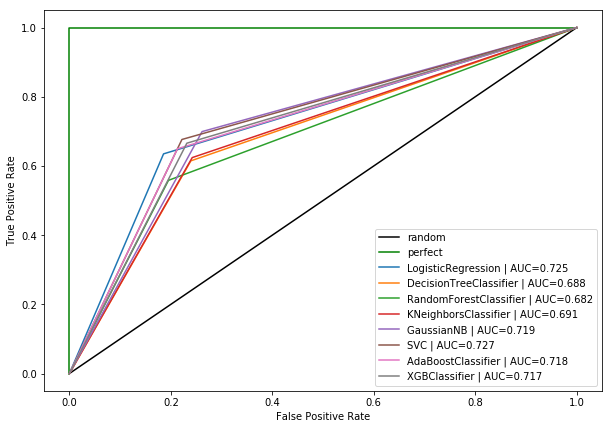

In [123]:
# step 1: separate input features (X) and target (y)
drug = 'Amphet'
X = df_model.iloc[:,:12]
X = StandardScaler().fit_transform(X)
y = df_model[drug]

# step 2: split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#----------------------
# OPTIONAL: deal with unbalanced data using the Synthetic Minority Oversampling Technique (SMOTE)
# see: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
#X_train, y_train = sm.fit_sample(X_train, y_train)
#----------------------

# step 3: fit and evaluate classifiers for this drug
all_clfs = initialize_clfs()
#fitted_clfs = fit_eval_clfs(all_clfs, X_train, X_test, y_train, y_test)     # simple train/test split
fitted_clfs = fit_eval_clfs_Kfold(all_clfs, X, y, K=10)                      # Kfold
plot_confusion_matrices(fitted_clfs)
plot_roc_curves(fitted_clfs)

Conclusion Amphetamine:
- **Support Vector Machine (SVC)** and **Naive Bayes** yield the highest precision (our criterium), but 
SVC has the higher recall
- Future Work: in case that differnet classifiers yield similar results, take also into consideration the ease of implementation and calculation time.


- ROC curve appearance (edge) might be due to imbalanced data, see:
    - https://datascience.stackexchange.com/questions/24315/roc-curve-shows-strange-results-for-imbalanced-dataset
- Future Work: consider using PR curves in this case, see:
    - https://machinelearning.wustl.edu/mlpapers/paper_files/icml2006_DavisG06.pdf

## c) Cocaine
- looking for classifier with **high recall** (minimal FN)

,acc,f1_score,precision,recall
LogisticRegression,0.66,0.58,0.68,0.59
DecisionTreeClassifier,0.64,0.57,0.62,0.59
RandomForestClassifier,0.65,0.53,0.65,0.57
KNeighborsClassifier,0.65,0.57,0.62,0.58
GaussianNB,0.65,0.63,0.65,0.61
SVC,0.69,0.60,0.69,0.62
AdaBoostClassifier,0.66,0.60,0.66,0.60
XGBClassifier,0.68,0.61,0.67,0.63


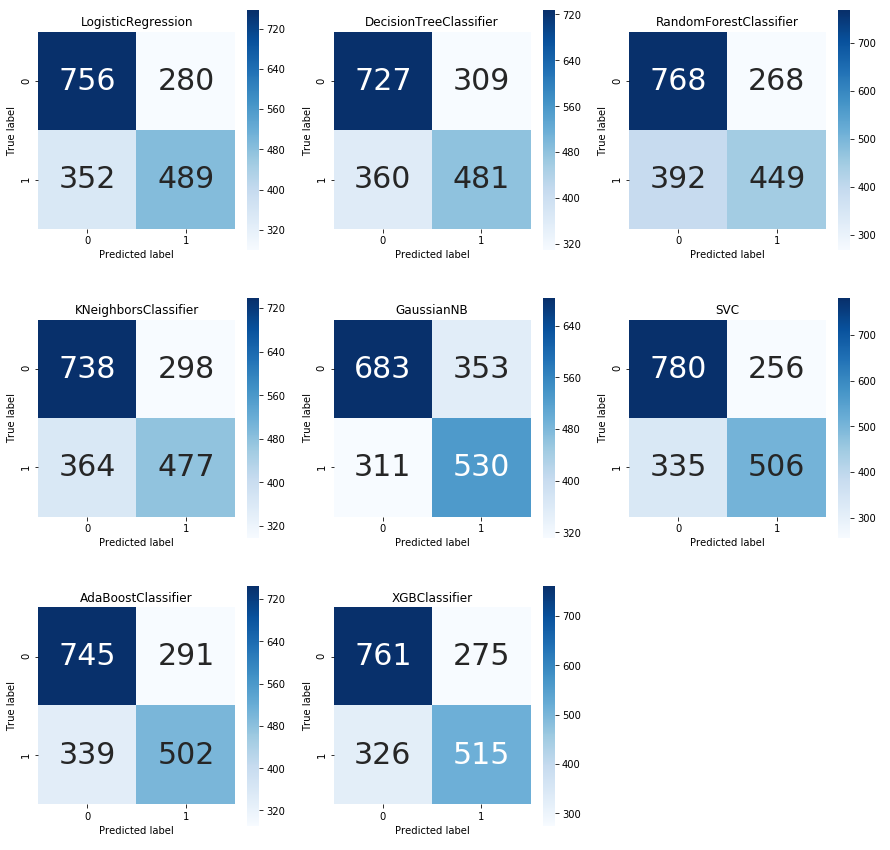

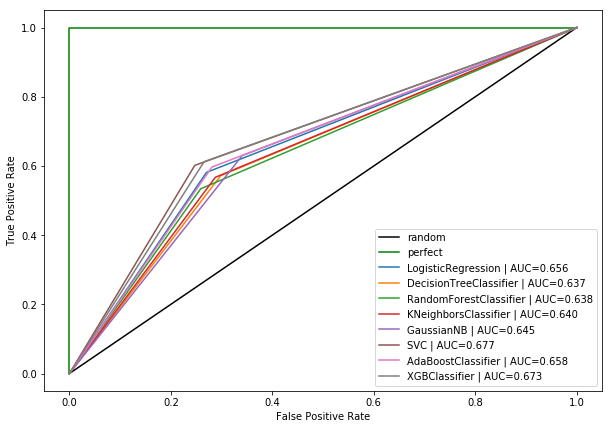

In [124]:
# step 1: separate input features (X) and target (y)
drug = 'Coke'
X = df_model.iloc[:,:12]
X = StandardScaler().fit_transform(X)
#X = X.drop(['Country', 'Ethnicity'], axis=1)
y = df_model[drug]

# step 2: split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

#------------------------
# OPTIONAL: deal with unbalanced data using the Synthetic Minority Oversampling Technique (SMOTE)
# see: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
#X_train, y_train = sm.fit_sample(X_train, y_train)
#------------------------


# step 3: fit and evaluate classifiers for this drug
all_clfs = initialize_clfs()
#fitted_clfs = fit_eval_clfs(all_clfs, X_train, X_test, y_train, y_test)     # simple train/test split
fitted_clfs = fit_eval_clfs_Kfold(all_clfs, X, y, K=10)                      # Kfold
plot_confusion_matrices(fitted_clfs)
plot_roc_curves(fitted_clfs)

Conclusion Cocaine:
- the **XGBClassifier** yields the highest recall (our criterium), and has also good precision (and highest AUC)
- Future Work: in case that differnet classifiers yield similar results, take also into consideration the ease of implementation and calculation time.


- ROC curve appearance (edge) might be due to imbalanced data, see:
    - https://datascience.stackexchange.com/questions/24315/roc-curve-shows-strange-results-for-imbalanced-dataset
- Future Work: consider using PR curves in this case, see:
    - https://machinelearning.wustl.edu/mlpapers/paper_files/icml2006_DavisG06.pdf

In [ ]:
# Future Work: Tune model parameters to increase precision and/or recall

### Visualization of modeling results (only for one selected classifier per drug)

In [ ]:
# ToDo

#### Decision Trees: plot tree with graphviz

In [ ]:
#import export_graphviz 
from sklearn.tree import export_graphviz  

# fit model
dt_small = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_small.fit(X_train,y_train)

# export decision tree to a tree.dot file for visualizing the plot easily anywhere 
export_graphviz(dt2, out_file ='tree.dot') 

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=400']);

# display
from IPython.display import Image
Image('tree2.png')

In [ ]:
dt_small.feature_importances_

---
# 7) Business Application

In [ ]:
# ToDo: Fit winner model to entire dataset and use fitted model to make predictions for business application

In [125]:
X = df_model.iloc[:,:12]
X = StandardScaler().fit_transform(X)

# winner model for cannabis: Logistic regression
y = df_model['Cannabis']
clf_Cannabis = LogisticRegression(solver = 'liblinear', random_state = 0)
clf_Cannabis.fit(X,y)

# winner model for amphetamine: Support Vector Classifier (SVC)
y = df_model['Amphet']
clf_Amphet = SVC(random_state = 0, probability=True)
clf_Amphet.fit(X,y)

# winner model for cocaine: XGBoost
y = df_model['Coke']
clf_Coke = SVC(random_state = 0, probability=True)  # XGBClassifier(random_state = 0)
clf_Coke.fit(X,y);

In [126]:
# write dictionaries to transform categorical variables into numeric variables for modeling

transform_Age_back = {y:str(x) for x,y in transform_Age.items()}
transform_Gender_back = {y:str(x) for x,y in transform_Gender.items()}
transform_Education_back = {y:str(x) for x,y in transform_Education.items()}
transform_Country_back = {y:str(x) for x,y in transform_Country.items()}
transform_Ethnicity_back = {y:str(x) for x,y in transform_Ethnicity.items()}

In [127]:
# ToDo: write function for business application

def calculate_premium(customer_dict, basic_premium = 300, 
                      risk_premium_light_drug = 0.2, 
                      risk_premium_moderate_drug = 0.6):
    '''DocString'''
    
    # transform input dict to dataframe
    X_customer = pd.DataFrame({k: [v] for k, v in customer_dict.items()}, index=['input data']) 
    
    # transform demographics from categories to numbers (for modeling)
    X_customer_numeric = X_customer.copy()
    X_customer_numeric.index = ['transformed data']
    
    # - Age
    X_customer_numeric.Age.replace(transform_Age_back, inplace=True)
    X_customer_numeric.Age = pd.to_numeric(X_customer_numeric.Age)
    
    # - Gender
    X_customer_numeric.Gender.replace(transform_Gender_back, inplace=True)
    X_customer_numeric.Gender = pd.to_numeric(X_customer_numeric.Gender)
    
    # - Education
    X_customer_numeric.Education.replace(transform_Education_back, inplace=True)
    X_customer_numeric.Education = pd.to_numeric(X_customer_numeric.Education)
    
    # - Country
    X_customer_numeric.Country.replace(transform_Country_back, inplace=True)
    X_customer_numeric.Country = pd.to_numeric(X_customer_numeric.Country)
    
    # - Ethnicity
    X_customer_numeric.Ethnicity.replace(transform_Ethnicity_back, inplace=True)
    X_customer_numeric.Ethnicity = pd.to_numeric(X_customer_numeric.Ethnicity)
    
    # display both the categorical and the numeric verions of the customer data
    #display(X_customer)
    #display(X_customer_numeric)
    display(pd.concat([X_customer, X_customer_numeric], axis=0))
    
    
    # use data and classifiers to make drug consumption predictions
    
    print('='*40)   # print line
    Cannabis_proba = clf_Cannabis.predict_proba(X_customer_numeric)[0][1]
    print('Cannabis risk:\t\t{:.3f} %'.format(Cannabis_proba*100))
    
    Amphet_proba = clf_Amphet.predict_proba(X_customer_numeric)[0][1]
    print('Amphetamine risk:\t{:.3f} %'.format(Amphet_proba*100))
    
    Coke_proba = clf_Coke.predict_proba(X_customer_numeric)[0][1]
    print('Cocaine risk:\t\t{:.3f} %'.format(Coke_proba*100))
    print('='*40)   # print line
    
    # potentially reject customer
    class color:
        RED = '\033[91m'
        GREEN = '\033[92m'
        BOLD = '\033[1m'
        UNDERLINE = '\033[4m'
        END = '\033[0m'
    
    if Coke_proba > 0.5:
        # reject customer
        print(color.BOLD + color.RED + '\nReject customer!' + color.END)
        return 
    else:
        # if not rejected, calculate premium for moderate drug
        final_premium = basic_premium \
                        + basic_premium * Cannabis_proba*risk_premium_light_drug \
                        + basic_premium * Amphet_proba*risk_premium_moderate_drug
        print(color.BOLD + color.GREEN + '\nFinal premium:   {:.2f}$'.format(final_premium) + color.END)
    
    return final_premium

In [100]:
# ToDo: create two potential customer with certain demographic values and personality traits

alice = {'Age': '18-24',           
         'Gender': 'female', 
         'Education': 'Left school at 17 years', 
         'Country': 'Australia',  # 'UK'
         'Ethnicity': 'Asian',
         
         'Nscore': -0.3, 
         'Escore': 0.5, 
         'Oscore': -0.5, 
         'Ascore': 1, 
         'Cscore': 0, 
         'Impulsive': -0.5, 
         'SS': -0.2}    

In [128]:
final_premium = calculate_premium(alice)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
input data,18-24,female,Left school at 17 years,Australia,Asian,-0.3,0.5,-0.5,1,0,-0.5,-0.2
transformed data,-0.95197,0.48246,-1.43719,-0.09765,-0.50212,-0.3,0.5,-0.5,1,0,-0.5,-0.2


Cannabis risk:		73.230 %
Amphetamine risk:	55.216 %
Cocaine risk:		27.584 %

Final premium:   443.33$


In [129]:
bob =   {'Age': '45-54',           
         'Gender': 'male', 
         'Education': 'Master degree', 
         'Country': 'USA',
         'Ethnicity': 'White',
         
         'Nscore': 0, 
         'Escore': 0.1, 
         'Oscore': -0.5, 
         'Ascore': 0, 
         'Cscore': 0, 
         'Impulsive': -0.5, 
         'SS': -0.2} 

In [130]:
final_premium = calculate_premium(bob)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
input data,45-54,male,Master degree,USA,White,0,0.1,-0.5,0,0,-0.5,-0.2
transformed data,1.09449,-0.48246,1.16365,-0.57009,-0.31685,0,0.1,-0.5,0,0,-0.5,-0.2


Cannabis risk:		32.657 %
Amphetamine risk:	18.293 %
Cocaine risk:		58.985 %

Reject customer!


---
# 8) Conclusions

- based on demographic and personality data, we are predict the probability of potential drug abuse for different drugs with good precision and recall
- different evaluation metrics (i.e. precision vs. recall) are important for our business case
- different classifiers yield different results in terms of evaluation metrics
- based on the drug-specific requirements, different classifiers are selected for each drug
- in our business case, predictions of potential drug abuse can be used in order to calculate a risk premium added to the basic fee or in the case of potential heavy drug abuse to comletely reject the customer

---
# 9) Future Work 

- imbalance problem (why) > use of drug groups/pleiades based on correlation between drug uses instead of using individual drugs > might yield better 
- data collection about fequency of drug use
- tuning of model (hyper)parameters